In [1]:
import numpy as np
import pandas as pd
from datetime import datetime 
import matplotlib.pyplot as plt
import json
from scipy.stats import norm

In [4]:
save_path = '/Users/chrisiyer/_Current/thesis_folder/face_experiment/results/data/main/unused pilots/'

file = 'taskdata_chris_main_task_pilot_prolific_test_typicals_25_04_2022.csv'
df = pd.read_csv(save_path + file)

In [5]:
# correcting silly errors in df_pro

df_pro = df[df.iteration.str.contains('prolific')]
exclude = []
for i in df_pro.subject_id.unique():
    curr = df_pro[(df_pro.subject_id == i) & (df_pro.trial_type == 'summary')]
    if (len(curr) < 1):
        exclude.append(i)

df_pro = df_pro[ [i not in exclude for i in df_pro.subject_id] ]

print("IDENTITIES EXCLUDED:\n",exclude)

IDENTITIES EXCLUDED:
 []


In [8]:
# correcting more errors
with open('/Users/chrisiyer/_Current/thesis_folder/face_experiment/stimuli/metadata_all_pairs_mb_altered.json', 'r') as myfile:
    data=myfile.read()
meta = json.loads(data)

In [9]:
for i in range(len(df_pro)):
    if df_pro.iloc[i]['retrieval_condition'] == 'new':
        iden = str(int(df_pro.iloc[i]['identity'])).zfill(3)
        df_pro['race'].iloc[i] = meta[iden]['race_common']

/Applications/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [10]:
df_pro[df_pro.retrieval_condition=='new']['race']

67      black
68      black
72      black
73      black
74      black
        ...  
1122    white
1123    white
1126    black
1128    black
1135    black
Name: race, Length: 263, dtype: object

In [11]:
# just get desired iterations
df_summary = df.loc[(df.iteration.str.contains('prolific')) & (df.trial_type == 'summary'),['subject_id', 'encoding_accuracy', 'encoding_avg_rt', 'filler_accuracy', 'filler_avg_rt', 'retrieval_accuracy', 'retrieval_avg_rt', 'total_bonus']]
df_summary

,subject_id,encoding_accuracy,encoding_avg_rt,filler_accuracy,filler_avg_rt,retrieval_accuracy,retrieval_avg_rt,total_bonus
139,6266d12bc803262aae0e8de2,83.0,4.11,90.0,3.55,52.0,5.33,0.00
383,5d734121d169f0001706ef8f,90.0,4.04,86.0,3.26,51.0,4.05,0.00
650,60a0586fbf36f3f1f4ba7970,70.0,5.08,91.0,2.75,65.0,4.97,0.00
693,5f98187948060d064c52948b,95.0,2.68,80.0,3.06,65.0,2.78,0.57
959,5df3dcdd9b92b12b6db3a4e5,73.0,3.63,86.0,2.73,57.0,2.30,0.00
965,5ac560359534ba0001c74715,65.0,2.77,100.0,2.27,58.0,2.78,0.00
989,5e6bc8dd966aa3000c8b2205,73.0,1.96,95.0,1.68,59.0,1.98,0.00
1136,595bee9282be5500017ad683,68.0,2.80,95.0,2.60,52.0,3.92,0.00


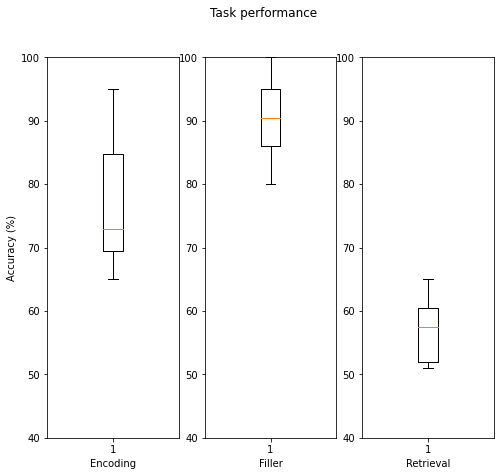

In [12]:
lims = (40,100)

# ENCODING
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(8,7))
fig.suptitle('Task performance')
ax1.boxplot(df_summary.encoding_accuracy)
ax1.set_xlabel('Encoding')
ax1.set_ylabel('Accuracy (%)')
ax1.set_ylim(lims)

ax2.boxplot(df_summary.filler_accuracy)
ax2.set_xlabel('Filler')
ax2.set_ylim(lims)

ax3.boxplot(df_summary.retrieval_accuracy)
ax3.set_xlabel('Retrieval')
ax3.set_ylim(lims)

plt.show()

In [10]:
df_pro['tilted'] = df_pro.tilt_difference != 0 

In [25]:
print(len(df_pro[df_pro.tilt_difference ==0 ]))
print(len(df_pro[df_pro.tilt_difference ==50 ]))
print(len(df_pro[df_pro.tilt_difference ==-50 ]))
np.mean( df_pro['tilted'][df_pro['retrieval_condition'] == 'old'].values )

222
106
118


0.5022421524663677

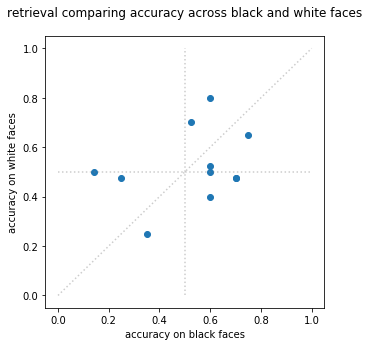

In [24]:
old_trials = df_pro[df_pro.retrieval_condition == 'old'] 

black_accuracy = [] 
white_accuracy = [] 

for i_subject in old_trials.subject_id.unique(): 
    
    subject_data = old_trials[old_trials.subject_id==i_subject]
    
    i_data = subject_data.groupby('race', as_index=False).mean()[['correct', 'rt']]
    
    black_accuracy.append(  i_data['correct'][0] ) 
    white_accuracy.append( i_data['correct'][1] )

plt.figure(figsize=[5,5])

plt.scatter(x=black_accuracy,y=white_accuracy)
plt.plot([0, 1], [0, 1], linestyle=':', color='grey', alpha=.4)
plt.plot([0, 1], [.5, .5], linestyle=':', color='grey', alpha=.4)
plt.plot([.5, .5], [0, 1], linestyle=':', color='grey', alpha=.4)
plt.xlabel('accuracy on black faces')
plt.ylabel('accuracy on white faces')
plt.title("retrieval comparing accuracy across black and white faces", y=1.05); 

In [13]:
tmp = df_pro[df_pro.retrieval_condition == 'old'].groupby(
    [ 'subject_id', 'race', 'tilt_difference'], as_index=False).mean()

True lens 22 22
False lens 11 11


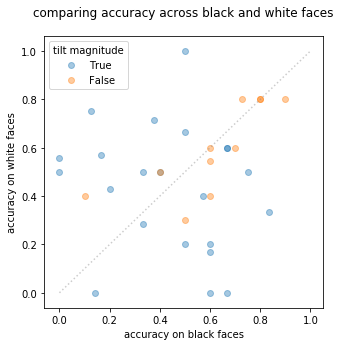

In [14]:
plt.figure(figsize=[5,5])

for i_tilt in [True, False]: 
    
    itilt = tmp[abs(tmp.tilted).values == i_tilt]
    
    black_accuracy = [itilt.iloc[i]['correct'] for i in range(len(itilt)) if itilt.iloc[i].race=='black']
    white_accuracy = [itilt.iloc[i]['correct'] for i in range(len(itilt)) if itilt.iloc[i].race=='white']
    
    print( i_tilt, 'lens', len(black_accuracy), len(white_accuracy ))
    
    plt.scatter(x=black_accuracy, y=white_accuracy, label=i_tilt, alpha=.4)

plt.plot([0, 1], [0, 1], linestyle=':', color='grey', alpha=.4)
plt.xlabel('accuracy on black faces')
plt.ylabel('accuracy on white faces')
plt.title("comparing accuracy across black and white faces", y=1.05); 
plt.legend(title='tilt magnitude') ; 

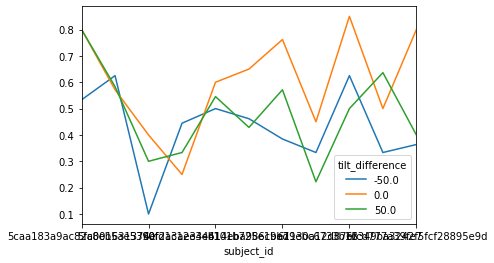

In [15]:
df_pro[df_pro.retrieval_condition == 'old'].groupby(
    ['subject_id', 'tilt_difference']).mean()['correct'].unstack().plot()

In [16]:
# encoding accuracy race delta - encoding rt race delta
# then relate to filler performance
# then relate to retrieval performance

In [27]:
dp = 0

df_pro[df_pro.trial_type == 'encoding'].groupby('subject_id', as_index=False).mean()

enc_acc_white = []
enc_acc_black = []
enc_acc_delta = []
enc_rt_white = []
enc_rt_black = []
enc_rt_delta = []

fil_acc = []
fil_rt = []

ret_acc_white = []
ret_acc_black = []
ret_acc_delta = []
ret_rt_white = []
ret_rt_black = []
ret_rt_delta = []
ret_d_white = []
ret_d_black = []
ret_d_delta = []

for i_sub in df_pro.subject_id.unique():
    curr = df_pro[df_pro.subject_id == i_sub]
    
    enc = curr[curr.trial_type == 'encoding']
    # want accuracy for all black faces, accuracy for all white faces
    enc_acc_white.append(enc.groupby('oddity_race').mean()['correct']['white'])
    enc_acc_black.append(enc.groupby('oddity_race').mean()['correct']['black'])
    enc_acc_delta.append( enc.groupby('oddity_race').mean()['correct']['white'] - 
                         enc.groupby('oddity_race').mean()['correct']['black'])
    
    enc_rt_white.append(enc.groupby('oddity_race').mean()['rt']['white'])
    enc_rt_black.append(enc.groupby('oddity_race').mean()['rt']['black'])
    enc_rt_delta.append( enc.groupby('oddity_race').mean()['rt']['white'] - 
                         enc.groupby('oddity_race').mean()['rt']['black'])
    
    fil =  curr[curr.trial_type == 'filler']
    fil_acc.append(fil.mean()['correct'])
    fil_rt.append(fil.mean()['rt'])
    
    ret = curr[(curr.trial_type == 'retrieval')]
    
    ret_acc_white.append(ret.groupby('race').mean()['correct']['white'])
    ret_acc_black.append(ret.groupby('race').mean()['correct']['black'])
    ret_acc_delta.append( ret.groupby('race').mean()['correct']['white'] - 
                         ret.groupby('race').mean()['correct']['black'])
    
    ret_rt_white.append(ret.groupby('race').mean()['rt']['white'])
    ret_rt_black.append(ret.groupby('race').mean()['rt']['black'])
    ret_rt_delta.append( ret.groupby('race').mean()['rt']['white'] - 
                         ret.groupby('race').mean()['rt']['black'])
    
    if (dp):
        ret_group = ret.groupby(['retrieval_condition', 'race', 'correct'], as_index=False).count()
        # 0: old black incorrect
        # 1: old black correct
        # 2: old white incorrect
        # 3: old white correct
        fa_b = ret.groupby(['retrieval_condition', 'race', 'correct'], as_index=False).count()['_id'][0]
        cr_b = ret.groupby(['retrieval_condition', 'race', 'correct'], as_index=False).count()['_id'][1]
        fa_w = ret.groupby(['retrieval_condition', 'race', 'correct'], as_index=False).count()['_id'][2]
        cr_w = ret.groupby(['retrieval_condition', 'race', 'correct'], as_index=False).count()['_id'][3]

        miss_b = ret.groupby(['retrieval_condition', 'race', 'correct'], as_index=False).count()['_id'][4]
        hit_b = ret.groupby(['retrieval_condition', 'race', 'correct'], as_index=False).count()['_id'][5]
        miss_w = ret.groupby(['retrieval_condition', 'race', 'correct'], as_index=False).count()['_id'][6]
        hit_w = ret.groupby(['retrieval_condition', 'race', 'correct'], as_index=False).count()['_id'][7]

        hitrate_b = hit_b / (hit_b+miss_b)
        farate_b = fa_b / (fa_b+cr_b)
        d_b = norm.ppf(hitrate_b) - norm.ppf(farate_b)

        hitrate_w = hit_w / (hit_w+miss_w)
        farate_w = fa_w / (fa_w+cr_w)
        d_w = norm.ppf(hitrate_w) - norm.ppf(farate_w)

        ret_d_white.append(d_w)
        ret_d_black.append(d_b)

        ret_d_delta.append(d_b - d_w)

In [28]:
# now we have:
# enc_acc_delta 
# enc_rt_delta 
# fil_acc 
# fil_rt 
# ret_acc_delta 
# ret_rt_delta 
# ret_d_delta 

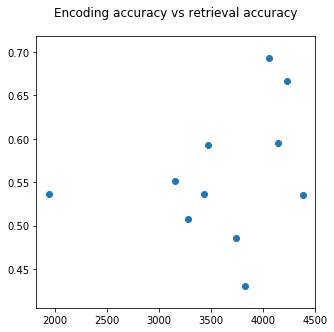

In [34]:
enc_rt = np.mean([enc_rt_white, enc_rt_black], axis=0)
enc_acc = np.mean([enc_acc_white, enc_acc_black], axis=0)
ret_rt = np.mean([ret_rt_white, ret_rt_black], axis=0)
ret_acc = np.mean([ret_acc_white, ret_acc_black], axis=0)
ret_d = np.mean([ret_d_white, ret_d_black], axis=0)

plt.figure(figsize=(5,5))
plt.scatter(enc_rt, ret_acc);
# plt.xlabel('Encoding accuracy (%)')
# plt.ylabel('Encoding RT (ms)')
plt.title("Encoding accuracy vs retrieval accuracy", y=1.05);

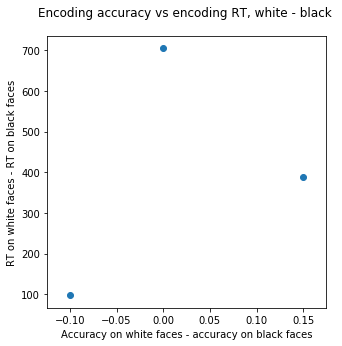

In [21]:
plt.figure(figsize=(5,5))
plt.scatter(enc_acc_delta, enc_rt_delta);
plt.xlabel('Accuracy on white faces - accuracy on black faces')
plt.ylabel('RT on white faces - RT on black faces')
plt.title("Encoding accuracy vs encoding RT, white - black ", y=1.05);

ValueError: x and y must be the same size

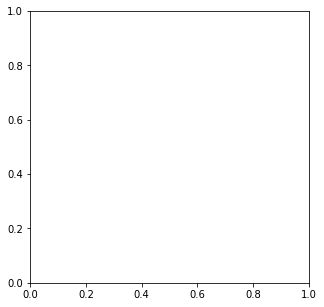

In [22]:
plt.figure(figsize=(5,5))
plt.scatter(enc_acc_delta, ret_d_delta);
plt.xlabel('Accuracy on white faces - accuracy on black faces')
plt.ylabel('Retrieval d\' on white faces - RT on black faces')
plt.title("Encoding accuracy vs retrieval d', white - black ", y=1.05);

for test_typicals iteration

In [109]:
import scipy.stats as stats

In [113]:
def compute_dp(n_hit, n_old, n_fa, n_new):
    hitrate = n_hit/n_old
    farate = n_fa/n_new
    
    if hitrate == 1 or farate == 0:
        # Hautus's correction
        hitrate = (n_hit+0.5)/(n_old+1)
        farate = (n_fa + 0.5)/(n_old+1)
    
    return stats.norm.ppf(hitrate) - stats.norm.ppf(farate)

def rand_jitter(arr, stdev=1):
    return arr + np.random.randn(len(arr)) * stdev

In [67]:
import functions as fun

In [66]:
notilt = df[df.tilt_change.str.contains('00C', na = False)]
tilt = df[].tilt_change


In [69]:
df['tilted'] = (~pd.isna(df.tilt_change)) &(~df.tilt_change.str.contains('00C', na = False))


In [111]:
# want accuracy and d' for tilted and untilted, w and b
# acc_w_t = []
# acc_w_n = []
# acc_b_t = []
# acc_b_n = []
d_w_t = []
d_w_n = []
d_b_t = []
d_b_n = []

for i in df.experiment_id.unique()[~pd.isna(df.experiment_id.unique())]:
    curr = df[df.experiment_id == i]
    
    hit_w_t = len(curr[(curr.retrieval_condition == 'old') & (curr.correct == 1.0) & 
                   (curr.tilted) & (curr.race == 'white')])
    old_w_t = len(curr[(curr.retrieval_condition == 'old') & 
                       (curr.tilted) & (curr.race == 'white')])
    
    hit_w_n = len(curr[(curr.retrieval_condition == 'old') & (curr.correct == 1.0) & 
                   (~curr.tilted) & (curr.race == 'white')])
    old_w_n = len(curr[(curr.retrieval_condition == 'old') & 
                       (~curr.tilted) & (curr.race == 'white')])
    
    fa_w = len(curr[(curr.retrieval_condition == 'new') & (curr.correct == 0.0) & 
                    (curr.race == 'white')])
    new_w = len(curr[(curr.retrieval_condition == 'new') & (curr.race == 'white')])
    
    
    hit_b_t = len(curr[(curr.retrieval_condition == 'old') & (curr.correct == 1.0) & 
                   (curr.tilted) & (curr.race == 'black')])
    old_b_t = len(curr[(curr.retrieval_condition == 'old') & 
                       (curr.tilted) & (curr.race == 'black')])
    
    hit_b_n = len(curr[(curr.retrieval_condition == 'old') & (curr.correct == 1.0) & 
                   (~curr.tilted) & (curr.race == 'black')])
    old_b_n = len(curr[(curr.retrieval_condition == 'old') & 
                       (~curr.tilted) & (curr.race == 'black')])
    
    fa_b = len(curr[(curr.retrieval_condition == 'new') & (curr.correct == 0.0) & 
                    (curr.race == 'black')])
    new_b = len(curr[(curr.retrieval_condition == 'new') & (curr.race == 'black')])
    
    
    d_w_t.append(compute_dp(hit_w_t, old_w_t, fa_w, new_w))
    d_w_n.append(compute_dp(hit_w_n, old_w_n, fa_w, new_w))
    d_b_t.append(compute_dp(hit_b_t, old_b_t, fa_b, new_b))
    d_b_n.append(compute_dp(hit_b_n, old_b_n, fa_b, new_b))
    

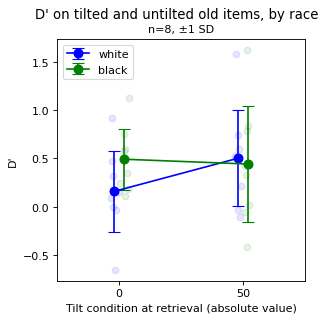

In [122]:
c = ['blue', 'green']
buffer = 2
al = 0.1

plt.figure(figsize=(4, 4), dpi=80)
plt.errorbar(x= np.array([0, 50])-buffer, 
         y = [np.mean(d_w_n), np.mean(d_w_t)], 
         yerr = [np.std(d_w_n), np.std(d_w_t)], 
        capsize =5, marker = 'o', mfc = c[0], mec=c[0], ms =8, ecolor=c[0], color=c[0], label = 'white')

plt.errorbar(x= np.array([0, 50])+buffer, 
          y = [np.mean(d_b_n), np.mean(d_b_t)], 
         yerr = [np.std(d_b_n), np.std(d_b_t)], 
        capsize =5, marker = 'o', mfc = c[1], mec=c[1], ms =8, ecolor=c[1], color=c[1], label = 'black')

plt.scatter(x = rand_jitter(np.repeat(0-buffer, len(d_w_n)), 1),y = d_w_n, color=c[0], alpha=al)
plt.scatter(x = rand_jitter(np.repeat(0+buffer, len(d_b_n)), 1),y = d_b_n, color=c[1], alpha=al)
plt.scatter(x = rand_jitter(np.repeat(50-buffer, len(d_w_t)), 1),y = d_w_t, color=c[0], alpha=al)
plt.scatter(x = rand_jitter(np.repeat(50+buffer, len(d_b_t)), 1),y = d_b_t, color=c[1], alpha=al)

plt.xlabel('Tilt condition at retrieval (absolute value)')
plt.xticks([0,50]); plt.xlim(-25,75)
plt.ylabel('D\'')
plt.suptitle('D\' on tilted and untilted old items, by race')
plt.title('n=' + str(len(d_w_t)) + ', ±1 SD', fontsize=10)
plt.legend()
plt.show()